In [ ]:
from charm.toolbox.pairinggroup import PairingGroup, ZR, G1, G2, GT, pair
from charm.toolbox.ABEnc import ABEnc
from abenc_ph_mj18 import PH_ABE, mat_math, Inner_Product
from nizk import NIZK
from benchmark import Benchmark
from collections import defaultdict 
import time

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [5]:
with open('data_136K_mj18_tg22_enhd.pkl','rb') as file:
    datasets = pickle.load(file)

In [4]:
with open('data_136K_mj18_k_2_n_5_35_65_95_DO_5_M_100.pkl','rb') as file:
    datasets_parms = pickle.load(file)

## Ploting


### Functions

In [13]:
def plot_entities(xs, ys, labels, label_size=22, legend_size=22, fig_name = ""):
    # Plotting:
    plt.figure(figsize=(10,6))

    # List of linestyles for variation. You can extend this if needed.
    linestyles = ['-.', '--', '-',':','solid', 'dashed', 'dashdot', 'dotted']
    sp_linestyles = ['-.', ':', '-']
    
    # Plotting the regular data points for each k_value
    for y, label, style in zip(ys, labels, linestyles):
        #print (xs, y)
        plt.plot(xs, y, label=f'{label}', linestyle=style)

    # Setting labels, title, legend, etc.
    plt.xlabel('Number of attribute authority', fontsize = label_size)
    plt.ylabel('Elapsed Time (seconds)', fontsize = label_size)
    # plt.title(f'Performance result with fixed k: {k}', fontsize = title_size)
    plt.legend(prop={'size': legend_size})
    plt.grid(True)
    plt.tight_layout()

    if fig_name:
        plt.savefig('./figures/'+fig_name+'.png', dpi = 150)
        
    #plt.title(title)
    plt.show()

In [14]:
def plot_comp_total(xs, ys, comp_ys, labels,label_size = 22, legend_size = 22, fig_name = ""):
    plt.figure(figsize=(10, 6))

    linestyles = ['-.','--', ':']

    plt.plot(xs, ys, label=f'Base: {labels[0]}', linestyle='-')

    # Plotting the subsequent data sets and calculating differences for Compare Set 1
    for i, y_,  label, style in zip(range(len(ys)), comp_ys, labels[1:], linestyles):

        plt.plot(xs, y_, label=f'Cp: {label}', linestyle=style, alpha=0.7)

        plt.fill_between(xs, ys, y_, color='gray', alpha=0.2)

        diff = (np.array(y_) - np.array(ys)) / np.array(ys) * 100
        avg_increase = np.mean(diff)

        # Finding the midpoint for annotation
        mid_index = len(xs) // 2  # Finding the index at the middle of the dataset
        mid_x = xs[mid_index]  # X-coordinate at the midpoint
        mid_y = (ys[mid_index] + y_[mid_index]) / 2  # Average Y-coordinate at the midpoint

        #print (avg_increase, mid_x, mid_y)

        if avg_increase >= 0:
            plt.annotate(f'Avg. increase: {avg_increase:.2f}%', xy=(mid_x, (mid_y+y_[-1])/2), textcoords='data', ha='center', size= 25)
        else:
            plt.annotate(f'Avg. decrease: {-avg_increase:.2f}%', xy=(mid_x, (mid_y+y_[0])/2), textcoords='data', ha='center', size= 25)


    plt.xlabel('Number of attribute authority', fontsize = label_size)
    plt.ylabel('Time Cost (seconds)', fontsize = label_size)
    plt.legend(prop={'size': legend_size})
    plt.grid(True)
    plt.tight_layout()

    if fig_name:
        plt.savefig('./figures/'+fig_name+'.png', dpi = 150)
        
    #plt.title(title)
    plt.show()

In [15]:
def plot_comp_detail(xs, ys, comp_ys, labels, scheme_labels, show = True, label_size = 22, legend_size = 22, fig_name = ""):
    plt.figure(figsize=(10, 6))

    linestyles = ['-', '-.','--', ':']

    # Plotting the subsequent data sets and calculating differences for Compare Set 1
    for i, y, y_, label, style in zip(range(len(ys)), ys, comp_ys, labels, linestyles):
        plt.plot(xs, y, label=f'Base{i+1}: {label} of {scheme_labels[0]}', linestyle=style)
        plt.plot(xs, y_, label=f'CP{i+1}: {label} of {scheme_labels[1]}', linestyle=style, alpha=0.7)

        plt.fill_between(xs, y, y_, color='gray', alpha=0.2)

        diff = (np.array(y_) - np.array(y)) / np.array(y) * 100
        avg_increase = np.mean(diff)

        # if avg_increase > 300:
        #     avg_increase = np.mean(diff * np.array(y) / 100)

        # Finding the midpoint for annotation
        mid_index = len(xs) // 2  # Finding the index at the middle of the dataset
        mid_x = xs[mid_index]  # X-coordinate at the midpoint
        mid_y = (y[mid_index] + y_[mid_index]) / 2  # Average Y-coordinate at the midpoint

        if not show:
            continue
        
        if avg_increase >= 0:
            plt.annotate(f'Avg. increase: {avg_increase:.2f}%', xy=(mid_x, (mid_y+y_[-1])/2), textcoords='data', ha='center', size= 25)
        else:
            plt.annotate(f'Avg. decrease: {-avg_increase:.2f}%', xy=(mid_x, (mid_y+y[0])/2), textcoords='data', ha='center', size= 25)

    plt.xlabel('Number of attribute authority', fontsize = label_size)
    plt.ylabel('Time Cost (seconds)', fontsize = label_size)
    plt.legend(prop={'size': legend_size})
    plt.grid(True)
    plt.tight_layout()

    if fig_name:
        plt.savefig('./figures/'+fig_name+'.png', dpi = 150)
        
    #plt.title(title)
    plt.show()

### Plots

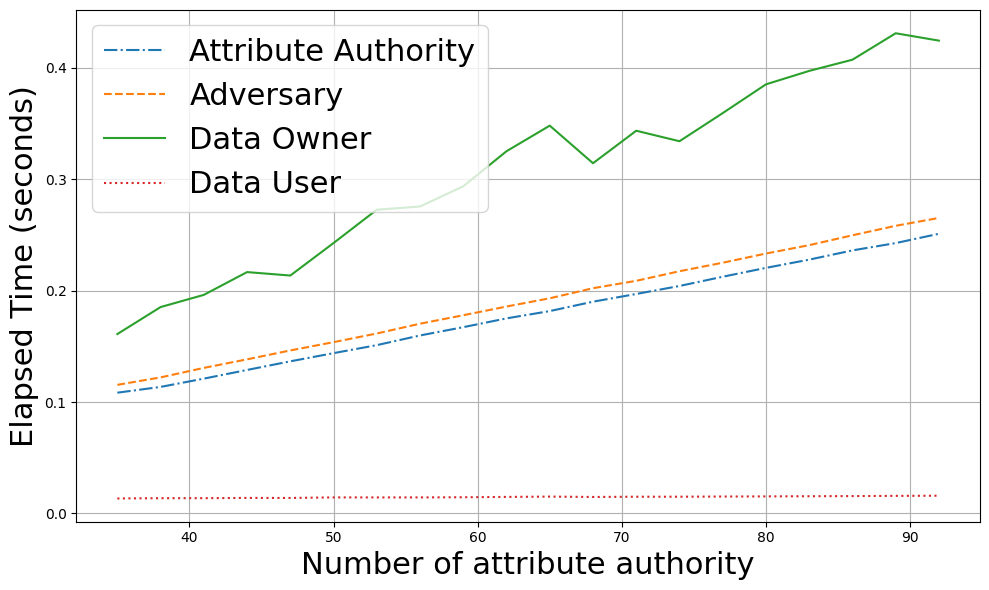

In [30]:
k = 2
xs = range(35,95,3)
aa = []
do = []
du = []
ad = []
labels = ['Attribute Authority', 'Adversary', 'Data Owner', 'Data User']

for n in xs:
    d = datasets[f'k_{str(k)}_n_{str(n)}']['mj18']
    aa.append((d['auth'] + d['keygen'])/n)
    ad.append(d['ad_setup'] + d['ad_cancel_out'] + d['ad_keygen'])
    do.append(d['encrypt'])
    du.append(d['decrypt'])

plot_entities(xs, [aa,ad, do,du], labels)

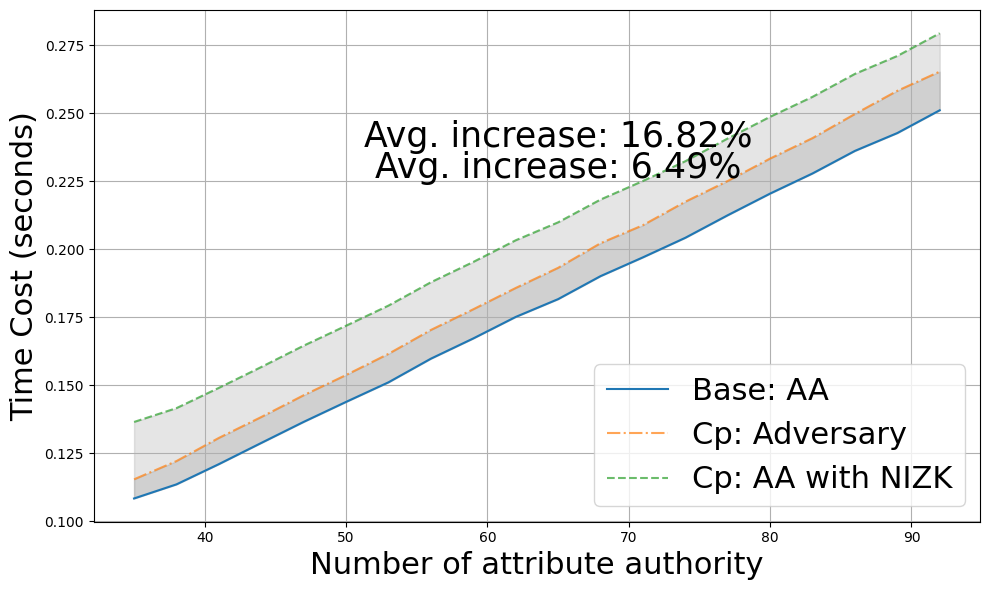

In [29]:
k = 2
xs = range(35,95,3)
comp1 = []
comp2 = []
base = []

for n in xs:
    d = datasets[f'k_{str(k)}_n_{str(n)}']['mj18']
    base.append((d['auth'] + d['keygen'])/n)
    comp1.append(d['ad_setup'] + d['ad_cancel_out'] + d['ad_keygen'])
    comp2.append((d['auth'] + d['keygen'] + d['prove'] + d['verify'])/n)

plot_comp_total(xs, base, [comp1, comp2], ['AA', 'Adversary', 'AA with NIZK'])

In [ ]:
def plot_cost_pct(xs, ys, comp_ys, labels,label_size = 22, legend_size = 22, fig_name = ""):
    plt.figure(figsize=(10, 6))

    linestyles = ['-', '-.','--', ':']

    plt.plot(xs, ys, label=f'Base: {labels[0]}', linestyle='-')

    # Plotting the subsequent data sets and calculating differences for Compare Set 1
    for i, y_,  label, style in zip(range(len(ys)), comp_ys, labels[1:], linestyles):

        plt.plot(xs, y_, label=f'Cp: {label}', linestyle=style, alpha=0.7)

        plt.fill_between(xs, ys, y_, color='gray', alpha=0.2)

        diff = (np.array(y_) - np.array(ys)) / np.array(ys) * 100
        avg_increase = np.mean(diff)

        # Finding the midpoint for annotation
        mid_index = len(xs) // 2  # Finding the index at the middle of the dataset
        mid_x = xs[mid_index]  # X-coordinate at the midpoint
        mid_y = (ys[mid_index] + y_[mid_index]) / 2  # Average Y-coordinate at the midpoint

        #print (avg_increase, mid_x, mid_y)

        if avg_increase >= 0:
            plt.annotate(f'Avg. increase: {avg_increase:.2f}%', xy=(mid_x, (mid_y+y_[-1])/2), textcoords='data', ha='center', size= 25)
        else:
            plt.annotate(f'Avg. decrease: {-avg_increase:.2f}%', xy=(mid_x, (mid_y+y_[0])/2), textcoords='data', ha='center', size= 25)


    plt.xlabel('Number of attribute authority', fontsize = label_size)
    plt.ylabel('Time Cost (seconds)', fontsize = label_size)
    plt.legend(prop={'size': legend_size})
    plt.grid(True)
    plt.tight_layout()

    if fig_name:
        plt.savefig('./figures/'+fig_name+'.png', dpi = 150)
        
    #plt.title(title)
    plt.show()

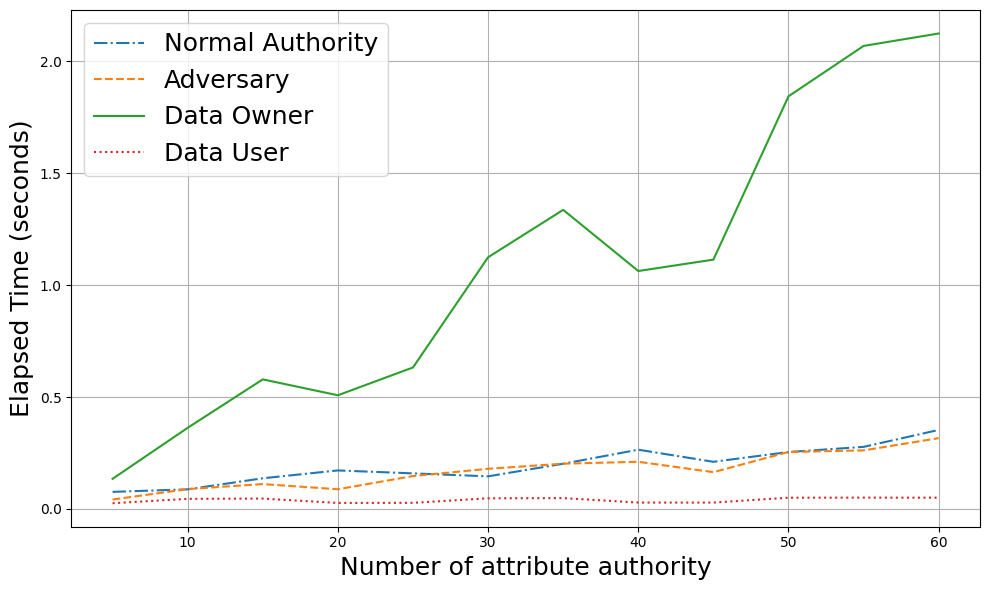

In [23]:
k = 5
xs = range(5,65,5)
ys = [] #AA, Adversary, DO, DU
labels = ["Normal Authority", "Adversary", "Data Owner", "Data User"]
#ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])

ys.append([(d['auth'] + d['keygen'])/i for i,d in zip(xs, datasets[str(k)]['seq'])])
ys.append([d['ad_setup'] + d['ad_cancel_out'] + d['ad_keygen'] for d in datasets[str(k)]['seq']])
ys.append([d['encrypt'] for d in datasets[str(k)]['seq']])
ys.append([d['decrypt'] for d in datasets[str(k)]['seq']])

plot_entities(k, xs, ys, labels)

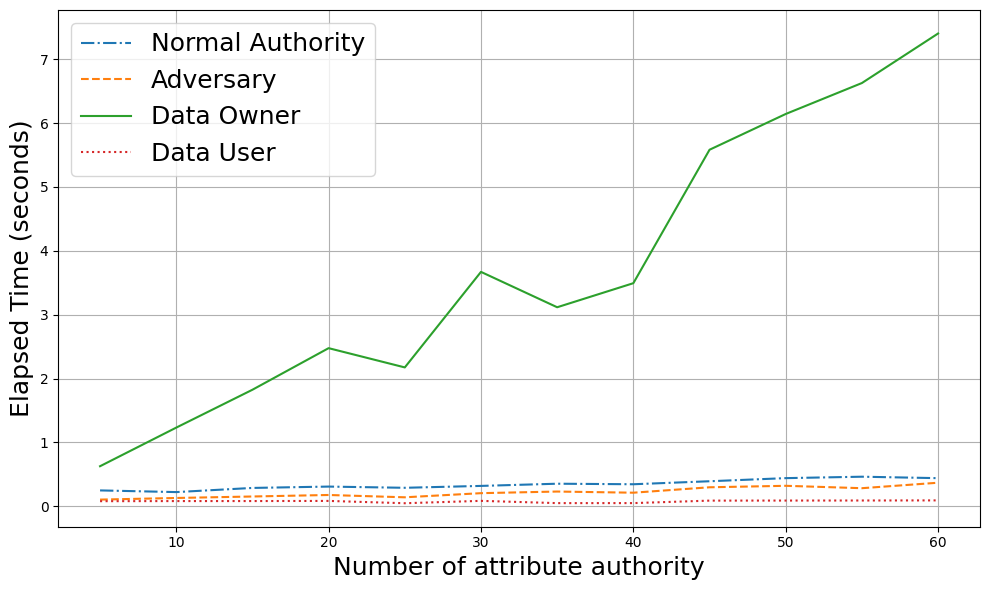

In [24]:
k = 10
xs = range(5,65,5)
ys = [] #AA, Adversary, DO, DU
labels = ["Normal Authority", "Adversary", "Data Owner", "Data User"]
#ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])

ys.append([(d['auth'] + d['keygen'])/i for i,d in zip(xs, datasets[str(k)]['seq'])])
ys.append([d['ad_setup'] + d['ad_cancel_out'] + d['ad_keygen'] for d in datasets[str(k)]['seq']])
ys.append([d['encrypt'] for d in datasets[str(k)]['seq']])
ys.append([d['decrypt'] for d in datasets[str(k)]['seq']])

plot_entities(k, xs, ys, labels)

### Other plots

In [43]:
def plot_linestyle(ks, xs, ys, sp_xs, sp_ys, labels):
    # Plotting:
    plt.figure(figsize=(10,6))

    # List of linestyles for variation. You can extend this if needed.
    linestyles = ['-', '--', ':']
    sp_linestyles = ['-.', ':', '-']
    
    # Plotting the regular data points for each k_value
    for y, label, style in zip(ys, labels, linestyles):
        #print (xs, y)
        plt.plot(xs, y, label=f'{label} with k={ks[0]}', linestyle=style)

    # Plotting the special cases
    for y, label, style in zip(sp_ys, labels, sp_linestyles):
        plt.plot(sp_xs, y, linestyle=style, marker='o', label=f'{label} with k={ks[1]}')

    vlines_x = [45, 85]  # example x-coordinates for the vertical lines

    for vx in vlines_x:
        plt.axvline(x=vx, color='gray', linestyle='--', alpha=0.7)  # draw vertical line
        
        if vx in xs:  # If vx is a value in xs, get its intersection with the regular plots
            idx = xs.index(vx)
            for y in ys:
                rounded_y = round(y[idx], 2)
                #plt.scatter(vx, rounded_y, color='red', zorder=5)
                plt.annotate(f'({vx}, {rounded_y})', (vx, rounded_y), textcoords="offset points", xytext=(0,10), ha='center')
        
        if vx in sp_xs:  # If vx is a value in sp_x, get its intersection with the special plots
            idx_sp = sp_xs.index(vx)
            for y in sp_ys:
                rounded_y_sp = round(y[idx_sp], 2)
                #plt.scatter(vx, rounded_y_sp, color='blue', zorder=5)
                plt.annotate(f'({vx}, {rounded_y_sp})', (vx, rounded_y_sp), textcoords="offset points", xytext=(0,10), ha='center')

    # Setting labels, title, legend, etc.
    plt.xlabel('Size of attribute authority')
    plt.ylabel('Elapsed Time (seconds)')
    #plt.title('Performance based on k-LIN Assumption Size')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.title(title)
    plt.show()


In [8]:
ks = [2,5]

xs = range(5,101,5)
ys = []
ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])
ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[0])]['seq']])
ys.append([(d['auth'] + d['keygen'])/i for i,d in zip(xs, datasets[str(ks[0])]['seq'])])

#ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])

#ys.append([d['total'] for d in datasets['3']['seq']])

sp_xs = range(5,102,8)
sp_ys = []
sp_ys.append([d['total'] for d in datasets[str(ks[1])]['seq']])
sp_ys.append([d['ad_setup'] + d['ad_cancel_out'] for d in datasets[str(ks[1])]['seq']])
sp_ys.append([(d['auth'] + d['keygen'])/i for i,d in zip(sp_xs, datasets[str(ks[1])]['seq'])])

#sp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])



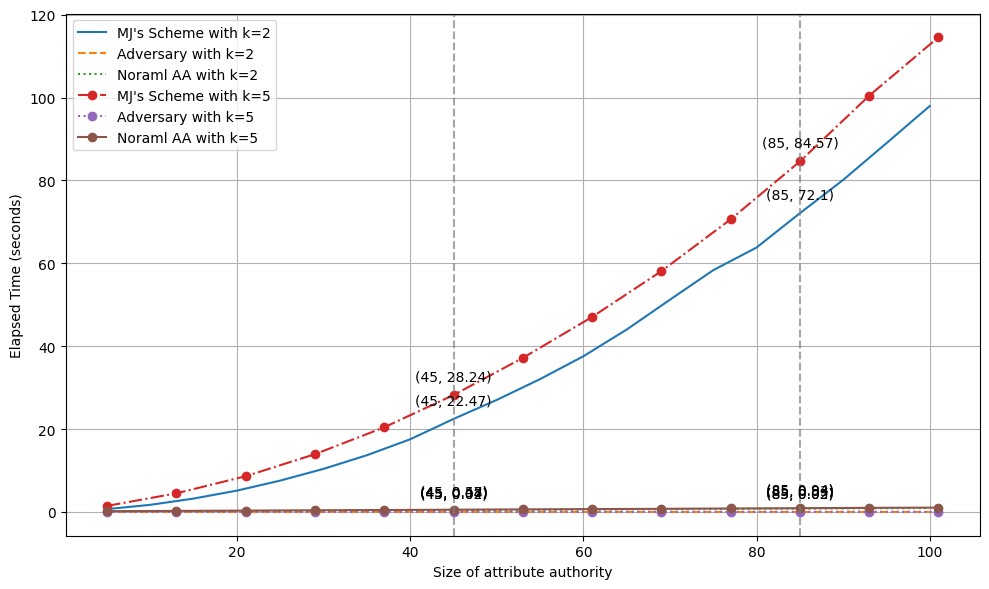

In [9]:
plot_linestyle(ks, xs, ys, sp_xs, sp_ys, ["MJ's Scheme", "Adversary", "Noraml AA"])

### Comparsion

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comp(ks, xss, ys, comp_ys, labels,label_size = 18, legend_size = 18):
    plt.figure(figsize=(10, 6))

    linestyles = ['-', '-.','--', ':']

    # Plotting the subsequent data sets and calculating differences for Compare Set 1
    for i, k, y, y_,  style in zip(range(len(ks)), ks, ys, comp_ys, linestyles):
        plt.plot(xss[i], y, label=f'CP{i+1}: {labels[0]} with k={k}', linestyle=style)
        plt.plot(xss[i], y_, label=f'CP{i+1}: {labels[1]} with k={k}', linestyle=style, alpha=0.7)

        plt.fill_between(xss[i], y, y_, color='gray', alpha=0.2)

        diff = (np.array(y_) - np.array(y)) / np.array(y) * 100
        avg_increase = np.mean(diff)

        # Finding the midpoint for annotation
        mid_index = len(xss[i]) // 2  # Finding the index at the middle of the dataset
        mid_x = xss[i][mid_index]  # X-coordinate at the midpoint
        mid_y = (y[mid_index] + y_[mid_index]) / 2  # Average Y-coordinate at the midpoint

        plt.annotate(f'Avg. increase: {avg_increase:.2f}%', xy=(mid_x, mid_y-5), textcoords='data', ha='center', size= 25)

    plt.xlabel('Number of attribute authority', fontsize = label_size)
    plt.ylabel('Time Cost (seconds)', fontsize = label_size)
    plt.legend(prop={'size': legend_size})
    plt.grid(True)
    plt.tight_layout()
    #plt.title(title)
    plt.show()


In [42]:
ks = [2,10]

xs = range(5,65,3)
comp_xs = range(5,65,5)
ys = []
comp_ys = []
ys.append([d['total'] for d in datasets[str(ks[0])]['seq']])
#ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[0])]['seq']])
comp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[0])]['seq']])

ys.append([d['total'] for d in datasets[str(ks[1])]['seq']])
#sp_ys.append([d['ad_setup'] + d['ad_keygen'] + d['ad_decrypt'] for d in datasets[str(ks[1])]['seq']])
comp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[1])]['seq']])

# ys.append([d['total'] for d in datasets[str(ks[2])]['seq']])
# comp_ys.append([d['total'] + d['prove'] + d['verify'] for d in datasets[str(ks[2])]['seq']])

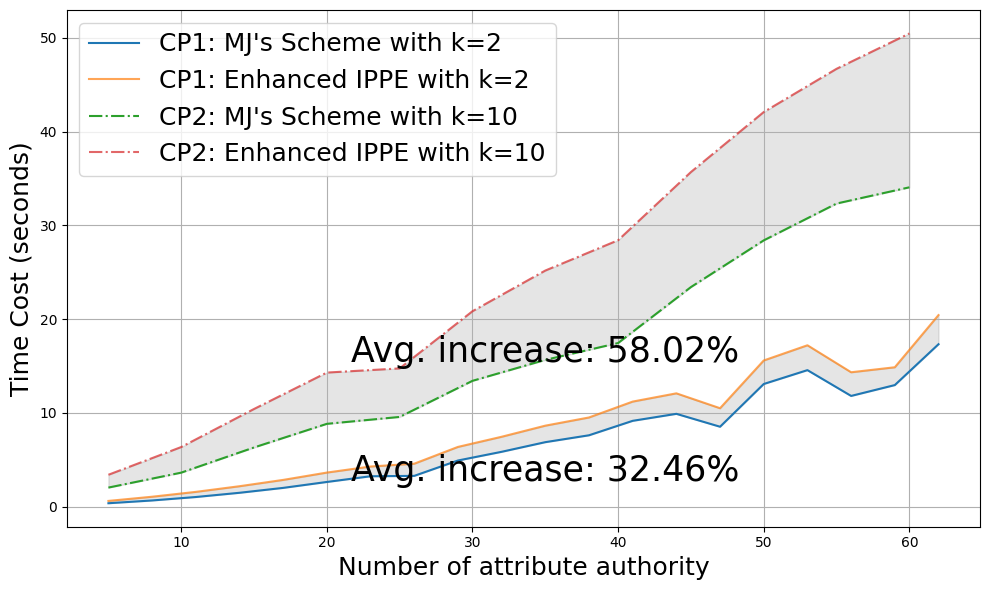

In [43]:
plot_comp(ks, [xs, comp_xs, comp_xs], ys, comp_ys, ["MJ's Scheme", 'Enhanced IPPE'])#, "Compare Cost for Original Scheme and our Enhanced IPPE")